In [4]:
import time
from selenium import webdriver
import pandas as pd
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
MAX_PAGE_NUM = 1       #number of pages 
path=r"/Users/ahmedsaad/Desktop/Data science/geckodriver"  ## you need to setup geckodriver first from 
driver=webdriver.Firefox(executable_path=path)
rate1=[]
number_of_reviwers=[]
publication_year=[]
for i in range(1, MAX_PAGE_NUM + 1): 
    page_num =  str(i)
    url = "https://www.idefix.com/kategori/Kitap/Bilim/grupno=00052?Page=" + page_num 
    driver.get(url)
    names = driver.find_elements_by_xpath('//a[@class="who"]')
    author=[name.text for name in names]
    prices = driver.find_elements_by_xpath('//span[@class="price price"]')
    books_prices=[re.sub(r'(?is),', '.' , price.text[:-3]) for price in prices]
    books = driver.find_elements_by_xpath('//div[@class="box-title"]')
    books_names=[book.text for book in books ]
    links = driver.find_elements_by_xpath('/html/body/div[1]/section/div/div[2]/div[1]/div[5]/div/div[3]/div[2]/section/div/div/div/div/div/div/div/div[3]/a')
    booksURLs = [elem.get_attribute('href') for elem in  links] # link to get to each book on the website 
    for j in booksURLs:                       
        driver.get(j)
        time.sleep(3)      ## To keep the data from corrupted
        reviwers=driver.find_elements_by_xpath("/html/body/div[1]/section/div/div[2]/section[2]/div[1]/div/div/div[3]/div[2]/div[1]/div[2]/span/span[3]")[0].text
        number_of_reviwers.append(reviwers)
        rate=driver.find_elements_by_xpath("/html/body/div[1]/section/div/div[2]/section[2]/div[1]/div/div/div[3]/div[2]/div[1]/div[2]/span/span[1]")[0].text
        rate1.append(re.sub(r'(?is),', '.' ,rate))
        #publicationYear=driver.find_elements_by_xpath("/html/body/div[1]/section/div/div[2]/section[2]/div[2]/div/div/div/div/div/div[1]/div/ul/li[8]/a")[0].text
        #publication_year=[publication for publication in publicationYear]

In [5]:
#Easiest way to store your data in csv file
scraped_data = pd.DataFrame({'Author': author, 'ItemPrice': books_prices,'Name':books_names,'Rate':rate1,'Reviwers':number_of_reviwers}) 
scraped_data.to_csv("book_sc.csv",index=False) # give any name to csv file 
pd.read_csv("book_sc.csv") #read csv file 

,Author,ItemPrice,Name,Rate,Reviwers
0,Serkan Karaisma...,34.30,Arachnoid Mater,3.5,19
1,Stephen Hawking,17.40,Zamanın Kısa Tarihi,4.0,125
2,Tristan Gooley,18.00,Doğanın İşaretlerini Okumanın Kaybolmuş Sanatı,4.0,26
3,Daniel Chamovitz,16.80,Bitkilerin Bildikleri,4.0,27
4,Serkan Karaisma...,25.20,Beyinde Ararken Bağırsakta Buldum,3.5,56
5,Cem Say,13.20,Yeni Dünya Yeni Ağ,0.0,0
6,Charles Darwin,28.00,Türlerin Kökeni,4.0,31
7,Ed Yong,23.40,Mikrobiyota,4.0,25
8,David Eagleman,23.40,Incognito - Beynin Gizli Hayatı,4.0,135
9,Sinan Canan,21.00,İFA: İnsanın Fabrika Ayarları 2. Kitap-İlişkil...,3.0,4


[[196.81825611   5.28281349]
 [  5.28281349   2.79265873]]
Mean:  24.438055555555554
Median:  21.385
stdev:  13.832970842528619


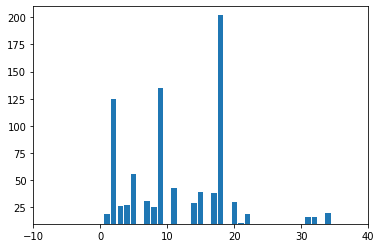

In [9]:
list_1=[]
iteamPrice = list(map(float,books_prices))
Reviwers = list(map(int, number_of_reviwers))  
Rate=list(map(float, rate1))
print( np.cov(iteamPrice, Rate))
for i,j in enumerate(Reviwers):
    list_1.append(i+1)
npiteamPrice=np.array(iteamPrice) 
print("Mean: ",npiteamPrice.mean())
print("Median: ",np.median(npiteamPrice))
print("stdev: ",np.std(npiteamPrice))
plt.bar(list_1,Reviwers)
plt.axis([-10,40,10,210])
plt.show()

In [11]:
a=''.join(books_names)
s=re.findall("[^-]",a)
d=''.join(s)
m=d.split()
q=Counter(m)
print(q,"\n")
inverse = [(value, key) for key, value in q.items()]
print("The most used word in the book names:  ",max(inverse)[1])

Counter({'ve': 4, 'Kısa': 2, 'Gizli': 2, 'Dünyayı': 2, 'Bir': 2, 'Kitap': 2, 'Şey': 2, 'Arachnoid': 1, 'MaterZamanın': 1, 'TarihiDoğanın': 1, 'İşaretlerini': 1, 'Okumanın': 1, 'Kaybolmuş': 1, 'SanatıBitkilerin': 1, 'BildikleriBeyinde': 1, 'Ararken': 1, 'Bağırsakta': 1, 'BuldumYeni': 1, 'Dünya': 1, 'Yeni': 1, 'AğTürlerin': 1, 'KökeniMikrobiyotaIncognito': 1, 'Beynin': 1, 'HayatıİFA:': 1, 'İnsanın': 1, 'Fabrika': 1, 'Ayarları': 1, '2.': 1, 'Kitapİlişkiler': 1, 'StresBüyük': 1, 'Sorulara': 1, 'YanıtlarPersler': 1, "Anadolu'da": 1, 'Kudret': 1, 'Görkemİnsanın': 1, 'KusurlarıGen': 1, 'BencildirKimsenin': 1, 'Bilemeyeceği': 1, 'ŞeylerEvren': 1, '101Kara': 1, 'DeliklerTanrı': 1, 'YanılgısıHayvanların': 1, 'Yaşamıİnsanlık': 1, '2.0Eşyanın': 1, 'TabiatıYaratıcı': 1, 'TürFikirler': 1, 'Nasıl': 1, 'Yeniden': 1, 'YaratıyorSon': 1, 'YıllarımBiraz': 1, "Kuantum'dan": 1, 'Zarar': 1, 'GelmezTesla:': 1, 'Modern': 1, 'Dünyanın': 1, 'MucidiDoğa': 1, 'Kitabı:': 1, 'BitkilerHayvanlar': 1, 'GezegenimizYeryü